<h1> Característica Torque x Velocidade motor de indução trifásico

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import cmath

<h5> Definindo os parametros da máquina

In [31]:
V1 = 460/pow(3, 1/2)
freq = 60
polos = 4
hp = 25

R1 = 0.15
X1 = 0.852
Xm = 20
R2_ = 0.154
X2_ = 1.066

<h5> Calculando os parâmetros do equivalewnte de Thévenin

In [32]:
Vth = (V1*Xm*1j)/(R1+(X1+Xm)*1j)
Zth = pow(1/(Xm*1j)+1/(R1+X1*1j),-1)

Rth = Zth.real
Xth = Zth.imag

Vth_mod, Vth_ang = cmath.polar(Vth)
Vth_ang = Vth_ang*360/(2*np.pi)

print("Vth = {}|_{} V".format(Vth_mod, Vth_ang))
print("Rth = ", Rth)
print("Xth = ", Xth)

Vth = 254.72305059514355|_0.4121532076864707 V
Rth =  0.13798546610124393
Xth =  0.8181804057124107


<h5> Calculando o torque trifásico

In [36]:
# Calculando a velocidade síncrona

n_s = 120*freq/polos
omega_s = n_s*2*np.pi/60
print("Velocidade síncrona = {} rpm".format(n_s))
print("Velocidade síncrona = {} rad/s".format(omega_s))

s = np.linspace(1, 0.0001, 100)

# Calculando o torque

T = (3/omega_s)*(R2_/s)*(abs(Vth)**2)/((Rth+R2_/s)**2 + (Xth + X2_)**2)

Velocidade síncrona = 1800.0 rpm
Velocidade síncrona = 188.49555921538757 rad/s


<h5> Cirando a curva Torque x Velocidade

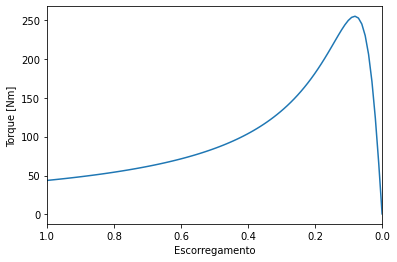

In [38]:
plt.xlabel("Escorregamento")
plt.ylabel("Torque [Nm]")

# Invertendo o sentido do eixo x
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.plot(s, T)
plt.savefig("Curva torque x velocidade.jpg")
plt.show()